<a href="https://colab.research.google.com/github/ItsmeJ0/CourseUdemyAI/blob/main/Keras_Syntax_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


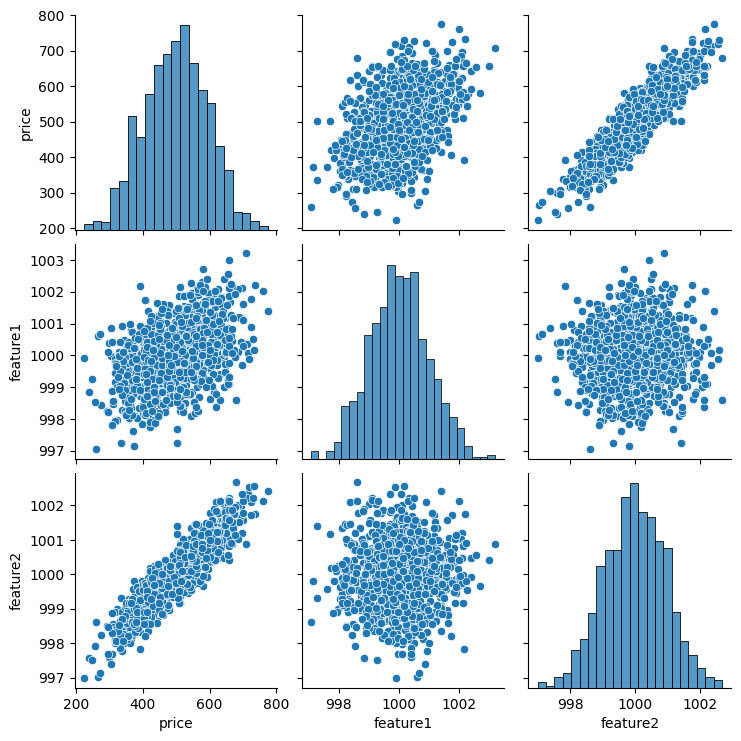

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)

### Test/Train Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [7]:
X_train.shape

(700, 2)

In [8]:
X_test.shape

(300, 2)

In [9]:
y_train.shape

(700,)

In [10]:
y_test.shape

(300,)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [13]:
scaler = MinMaxScaler()

In [14]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 135

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
help(Sequential)

Help on class Sequential in module keras.src.engine.sequential:

class Sequential(keras.src.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.

# 136

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model - as a list of layers

In [21]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Model - adding in layers one by one

In [22]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [23]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [24]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 4ms/step - loss: 256591.3594
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256478.0781
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256347.6406
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256190.2188
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256000.8906
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255778.6562
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 255519.0781
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255217.1250
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 254869.8438
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 254471.3594
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 254018.7188
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [25]:
model.history.history

{'loss': [256591.359375,
  256478.078125,
  256347.640625,
  256190.21875,
  256000.890625,
  255778.65625,
  255519.078125,
  255217.125,
  254869.84375,
  254471.359375,
  254018.71875,
  253507.078125,
  252929.09375,
  252277.4375,
  251552.953125,
  250745.421875,
  249852.546875,
  248867.25,
  247784.484375,
  246591.9375,
  245291.125,
  243869.46875,
  242329.671875,
  240663.65625,
  238850.484375,
  236903.046875,
  234814.578125,
  232570.875,
  230157.6875,
  227604.015625,
  224843.46875,
  221923.703125,
  218819.265625,
  215533.765625,
  212077.234375,
  208413.171875,
  204566.328125,
  200535.953125,
  196290.125,
  191831.6875,
  187150.0625,
  182292.578125,
  177247.984375,
  172003.640625,
  166551.890625,
  160909.0,
  155085.921875,
  149084.296875,
  142908.84375,
  136575.34375,
  130108.9375,
  123530.390625,
  116804.625,
  110028.3515625,
  103111.0390625,
  96097.265625,
  89133.671875,
  82160.765625,
  75192.4921875,
  68284.4140625,
  61423.7890625,
  

In [26]:
loss = model.history.history['loss']

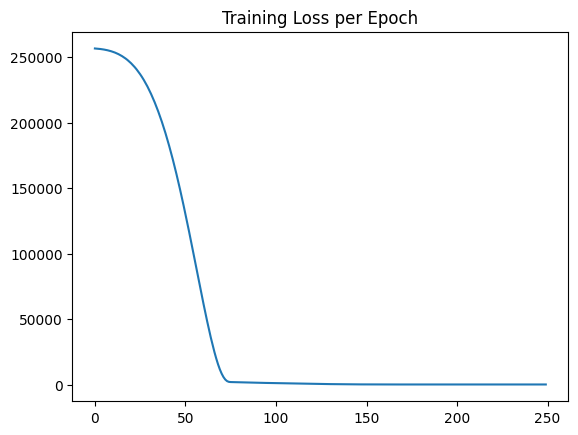

In [27]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Compare final evaluation (MSE) on training set and test set.

In [28]:
model.metrics_names

['loss']

In [29]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [30]:
training_score

23.767772674560547

In [31]:
test_score

25.344160079956055

### Further Evaluations

In [32]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [33]:
test_predictions

array([[405.6787 ],
       [624.21924],
       [592.7789 ],
       [572.81635],
       [366.9135 ],
       [579.79376],
       [515.5484 ],
       [459.5843 ],
       [549.8054 ],
       [447.9843 ],
       [612.4508 ],
       [549.56635],
       [419.5043 ],
       [409.25412],
       [652.0008 ],
       [437.74246],
       [509.0124 ],
       [660.6252 ],
       [663.3005 ],
       [566.1562 ],
       [334.50125],
       [445.27313],
       [382.86987],
       [379.1106 ],
       [567.19635],
       [611.2336 ],
       [532.94324],
       [428.28333],
       [656.14264],
       [414.49835],
       [443.0908 ],
       [485.62363],
       [438.8507 ],
       [682.5875 ],
       [425.19952],
       [418.07477],
       [502.48874],
       [551.0614 ],
       [510.2306 ],
       [395.69464],
       [619.2736 ],
       [417.04465],
       [605.1114 ],
       [446.4322 ],
       [502.50647],
       [582.3844 ],
       [669.7743 ],
       [490.92136],
       [318.87122],
       [485.9195 ],


In [34]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [35]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [36]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [37]:
test_predictions

0      405.678711
1      624.219238
2      592.778870
3      572.816345
4      366.913513
          ...    
295    529.580688
296    515.800720
297    610.317383
298    417.378601
299    411.256653
Length: 300, dtype: float32

In [38]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [39]:
pred_df.columns = ['Test Y','Model Predictions']

In [40]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.678711
1,624.156198,624.219238
2,582.455066,592.778870
3,578.588606,572.816345
4,371.224104,366.913513
...,...,...
295,525.704657,529.580688
296,502.909473,515.800720
297,612.727910,610.317383
298,417.569725,417.378601


Let's compare to the real test labels!

<Axes: xlabel='Test Y', ylabel='Model Predictions'>

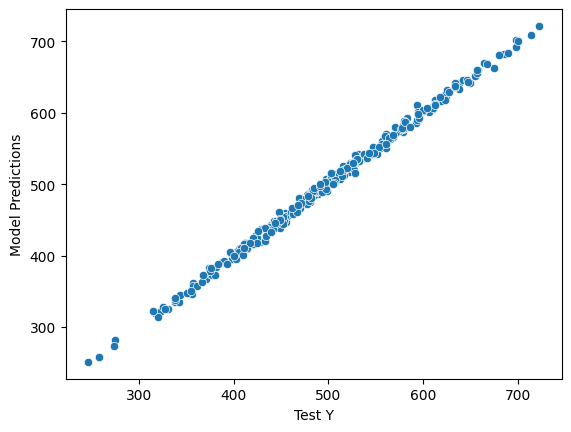

In [41]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [42]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

<ipython-input-43-12727d456eec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50)


<Axes: xlabel='Error', ylabel='Density'>

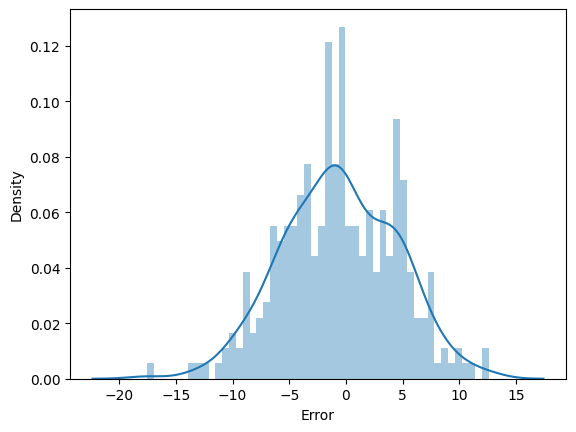

In [43]:
sns.distplot(pred_df['Error'],bins=50)

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [45]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.049605817429287

In [46]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.344162976114074

In [47]:
# Essentially the same thing, difference just due to precision
test_score

25.344160079956055

In [48]:
#RMSE
test_score**0.5

5.034298370175933

# Predicting on brand new data

In [49]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [50]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [51]:
new_gem = scaler.transform(new_gem)

In [52]:
model.predict(new_gem)

1/1 [==============================] - 0s 20ms/step


array([[420.05707]], dtype=float32)

## Saving and Loading a Model

In [53]:
from tensorflow.keras.models import load_model

In [54]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
later_model = load_model('my_model.h5')

In [56]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 77ms/step


array([[420.05707]], dtype=float32)